Source code for Image Input (Attempt 2)

In [2]:
import os 
from keras.utils import np_utils
import seaborn as sns 
from tensorflow.keras.initializers import RandomNormal
from PIL import Image as Image1
from IPython.display import display
from IPython.display import Image
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
import time
from zipfile import ZipFile

import cv2 as cv
from google.colab.patches import cv2_imshow

import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import Model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam

In [5]:
#import folder to session:
fp = '/content/CTScan_Cancer.zip'

with ZipFile(fp, 'r') as zip:
  zip.extractall()

print('done')

done


In [6]:
#Paths to folder:
test_path = '/content/Data/test'
train_path = '/content/Data/train'
val_path = '/content/Data/valid'



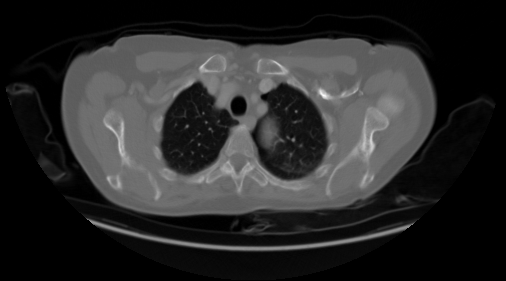

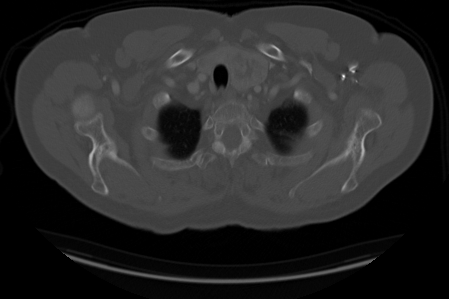

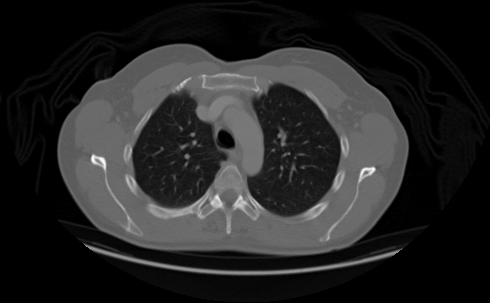

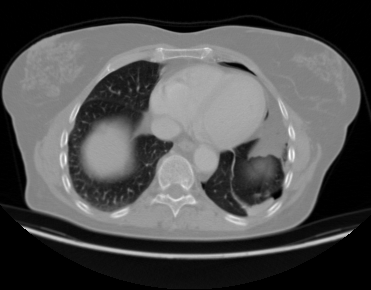

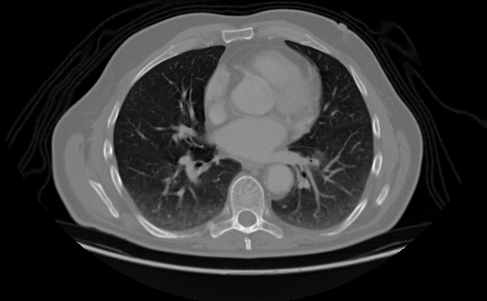

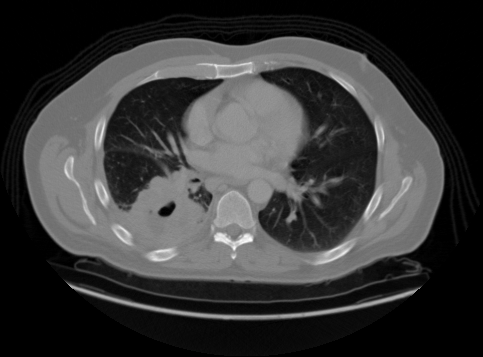

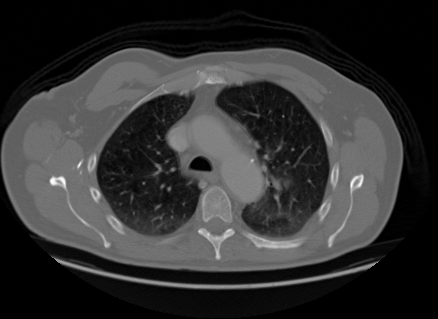

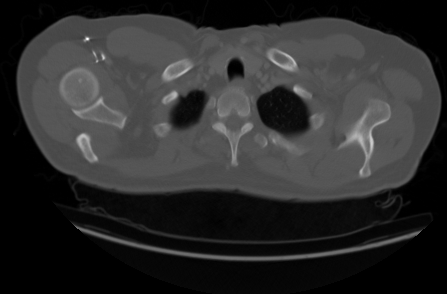

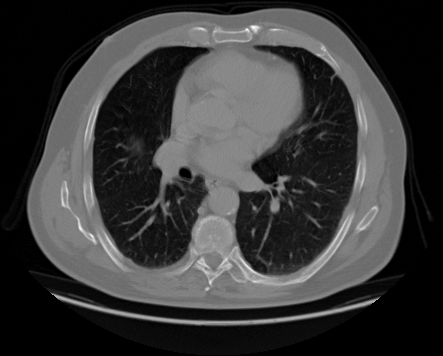

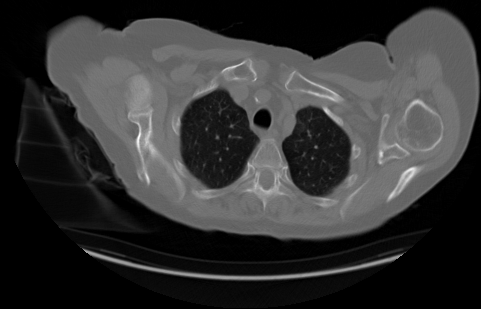

In [7]:
#Show images:

impath = os.listdir('/content/Data/test/adenocarcinoma')

for i in range(10):
  comb = '/content/Data/test/adenocarcinoma/' + impath[i]
  display(Image(comb))

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest',
                                  zoom_range=0.2,
                                  shear_range = 0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  rotation_range=0.4)

In [ ]:
train_data = train_datagen.flow_from_directory(train_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.


In [ ]:
train_data.class_indices

{'adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib': 0,
 'large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa': 1,
 'normal': 2,
 'squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa': 3}

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
val_data = val_datagen.flow_from_directory(val_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 72 images belonging to 4 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_data = test_datagen.flow_from_directory(test_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 315 images belonging to 4 classes.


In [ ]:
model = Sequential() 

#Making the CNN model
model.add(Conv2D(filters=32, kernel_size= (3,3), activation= 'relu', input_shape=(350,350,3)) )

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=4, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )
 
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 348, 348, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 346, 346, 32)      9248      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 173, 173, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 171, 171, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 85, 85, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 83, 83, 128)      

In [ ]:
#history = model.fit(train_data,y_train,epochs = 500 , validation_data = (val_data, y_val))
#This is to save accuracy values of model
mc = ModelCheckpoint(
    filepath="./ct_cnn_best_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [mc]

cnn = model.fit(
    train_data,
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 10,
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back
    )

Epoch 1/10
122/122 [==============================] - ETA: 0s - loss: 1.3855 - accuracy: 0.2763
Epoch 1: val_accuracy improved from -inf to 0.31429, saving model to ./ct_cnn_best_model.hdf5
122/122 [==============================] - 275s 2s/step - loss: 1.3855 - accuracy: 0.2763 - val_loss: 1.3874 - val_accuracy: 0.3143
Epoch 2/10
122/122 [==============================] - ETA: 0s - loss: 1.3707 - accuracy: 0.3141
Epoch 2: val_accuracy improved from 0.31429 to 0.32857, saving model to ./ct_cnn_best_model.hdf5
122/122 [==============================] - 274s 2s/step - loss: 1.3707 - accuracy: 0.3141 - val_loss: 1.3397 - val_accuracy: 0.3286
Epoch 3/10
122/122 [==============================] - ETA: 0s - loss: 1.2918 - accuracy: 0.4260
Epoch 3: val_accuracy improved from 0.32857 to 0.50000, saving model to ./ct_cnn_best_model.hdf5
122/122 [==============================] - 275s 2s/step - loss: 1.2918 - accuracy: 0.4260 - val_loss: 1.1494 - val_accuracy: 0.5000
Epoch 4/10
122/122 [========

In [ ]:
model = load_model("./ct_cnn_best_model.hdf5")

In [ ]:
accuracy_cnn = model.evaluate_generator(generator= test_data)[1] 
print(f"CNN Model Accuracy: {accuracy_cnn*100} %")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


CNN Model Accuracy: 51.11111402511597 %


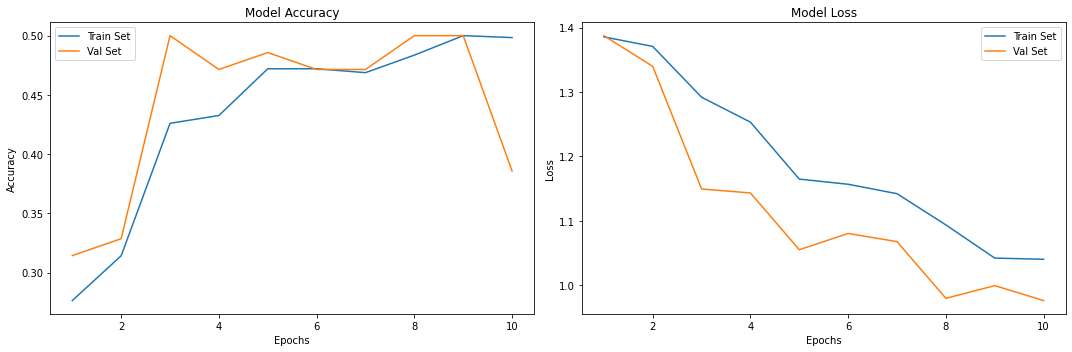

In [ ]:
# Plot model performance
acc = cnn.history['accuracy']
val_acc = cnn.history['val_accuracy']
loss = cnn.history['loss']
val_loss = cnn.history['val_loss']
epochs_range = range(1, len(cnn.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()